## Imports

In [118]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML

from sklearn import cluster as c

## Helper functions

In [74]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24
    
    display(HTML('<style>.container { width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Load dataset

In [75]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is C609-8D79

 Directory of C:\Users\Fu\Documents\h\My Drive\DS\PA005\pa005_insiders_clustering\insiders_program_-_clustering\notebooks

28/08/2022  15:03    <DIR>          .
26/08/2022  18:30    <DIR>          ..
26/08/2022  18:30                 0 notebook.ipynb
28/08/2022  15:03            71.128 c0 - notebook.ipynb
28/08/2022  15:03    <DIR>          .ipynb_checkpoints
               2 File(s)         71.128 bytes
               3 Dir(s)   2.697.678.848 bytes free


In [76]:
df_raw = pd.read_csv('../data/raw/data.csv')

In [77]:
df_raw.shape

(541909, 9)

In [78]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [79]:
df_raw.drop('Unnamed: 8',axis = 1, inplace = True)
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# Data Description

In [80]:
df1 = df_raw.copy()

## Columns Rename

In [81]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [82]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price','customer_id', 'country']

In [83]:
df1.columns = cols_new

In [84]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Data Dimensions

In [85]:
print(f'Number of Rows:{df1.shape[0]}')
print(f'Number of Columns:{df1.shape[1]}')

Number of Rows:541909
Number of Columns:8


## Data types

In [86]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [87]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [88]:
# Testing for possible anomalies:

# df1.invoice_no = df1.invoice_no.astype(int)

# invoice_date


## Check NA

In [89]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [90]:
# 135.080 customers....

## Replace NA

In [91]:
# Removing NAs
df1 = df1.dropna(subset =['description','customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0] / df_raw.shape[0])))

Removed data: 0.25


In [92]:
df1.shape

(406829, 8)

In [93]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change dtypes

In [94]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [95]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [96]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y' )
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [97]:
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [98]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## Descriptive Statistics

In [99]:
# do the model, then come back

# Feature Engineering

In [100]:
df2 = df1.copy()

## Feature Creation

In [101]:
# data referencing
df_ref = df2.drop(['invoice_no','stock_code','description',
                   'quantity','invoice_date','unit_price',
                   'country'], axis = 1).drop_duplicates(ignore_index = True)
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [102]:
# Gross Revenue ( qtt * price)
# Recency - latest purchase data for customer
# Frequency - how many products client bought in one year period


# Gross Revenue:
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary:
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, how = 'left', on = 'customer_id')



In [103]:
df_ref.isna().sum()

customer_id      0
gross_revenue    0
dtype: int64

In [104]:
# Recency - how long has it been since the last puchase.
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days  # using dt, to get int type
df_recency = df_recency[['customer_id','recency_days']].copy()
df_recency.head()

,customer_id,recency_days
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


In [105]:
df_ref = pd.merge(df_ref, df_recency, how = 'left', on = 'customer_id')
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
dtype: int64

In [106]:
df_ref.head()

,customer_id,gross_revenue,recency_days
0,17850,5288.63,302
1,13047,3079.10,31
2,12583,7187.34,2
3,13748,948.25,95
4,15100,635.10,330


In [107]:
# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()

In [108]:
df_freq.head()

,customer_id,invoice_no
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [109]:
df_ref = pd.merge(df_ref, df_freq, how = 'left', on = 'customer_id')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# Data Filtering

In [110]:
df3 = df_ref.copy()

# EDA

In [111]:
df4 = df3.copy()

# Data Preparation


In [112]:
df5 = df4.copy()

# Feature Selection

In [113]:
df6 = df5.copy()
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# Hyperparameter Fine-Tuning

In [116]:
X = df6.drop(columns = ['customer_id'])

In [117]:
X.head()

,gross_revenue,recency_days,invoice_no
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


## Within-Cluster Sum of Square (WSS)

In [124]:
# trying out diffente cluster values

clusters = [2,3, 4, 5, 6 ]

Text(0.5, 1.0, 'WSS vs K')

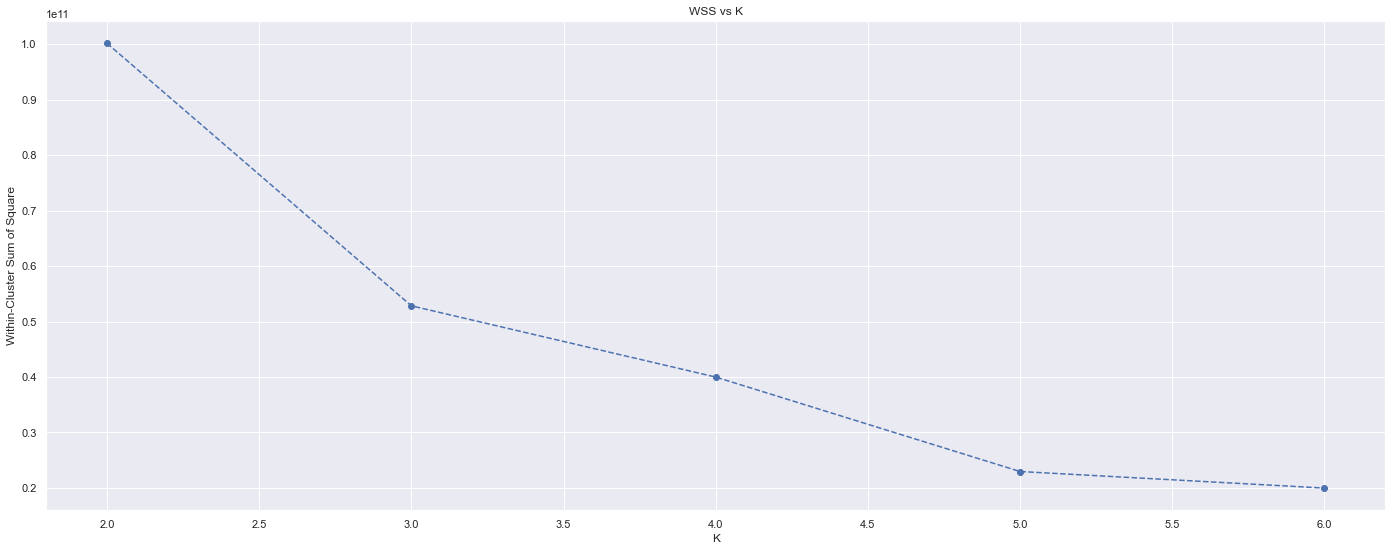

In [127]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)  # doing centroids at random # n_init, centroid starting times(?)
    # model training
    kmeans.fit(X)
    # validation
    wss.append(kmeans.inertia_)

# plootting wss - ELBOW method # We want to findout the best k before going for the final model
# like a pre-training model.
# This graph is supposed to look like an elbow... (?)
# Supposed to choose the point in the graph where the changes(The angle) most significative happen in this case
# happens where K = 3 and 5 - it is up to the Data Scientist to choose the best point.b

plt.plot(clusters, wss, linestyle = '--', marker ='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vs K')

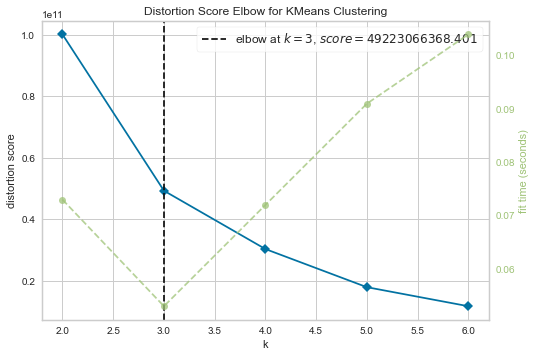

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
# Choosing K using a more elegant way, using the library yellowbrick
from yellowbrick.cluster import KElbowVisualizer
# !pip install yellowbrick.cluster

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timing = False)
kmeans.fit(X)
kmeans.show()  # it draws the method and tells you the best k value...

# There is also the knee method....

In [126]:
wss

[100161464120.90105,
 52830442008.00694,
 39986557693.70822,
 22956270440.126114,
 19974463394.768677]

In [ ]:
# In grouping / clustering WSS -> 

## Sillhouette Score

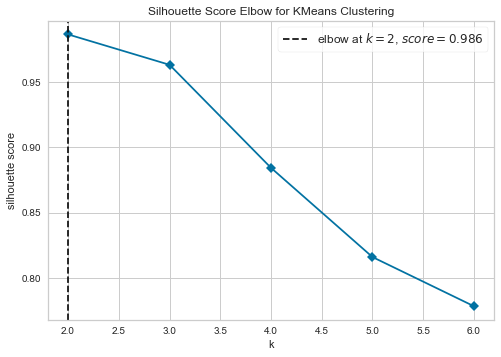

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [137]:
kmeans_si = KElbowVisualizer(c.KMeans(), k=clusters, metric = 'silhouette', timings = False)
kmeans_si.fit(X)
kmeans_si.show()

In [ ]:
# elbow deu '3', silhouette deu 2, qual escolher?
# a silhouetta, é melhor...
# cotovelo nao considera o tamanho do cluster.


# Model Training

# Cluster Analysis

# Deploy to production